# Imports

In [1]:
# executes in ~23 seconds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import bespoke module p04.py

In [2]:
# first test: executed in 46 seconds
# executes much faster if you first import pd and np
# executes in ~11 seconds
from p04 import vectorize_tfidf
from p04 import reduce_dim_lsa
from p04 import reduce_dim_lda
from p04 import display_topics

In [3]:
import pickle

In [4]:
with open('grouped_sorted.pickle', 'rb') as readfile:
    subjects = pickle.load(readfile)

In [5]:
subjects

,text,le
label,,
Linear Algebra,152,152
Probability,124,124
CS,104,104
Diff. Eq.,93,93
Algorithms,81,81
Statistics,79,79
Calculus,70,70
Data Structures,62,62
AI,48,48


In [6]:
with open('df.pickle', 'rb') as readfile:
    df = pickle.load(readfile)

In [7]:
df

,text,label,le
0,follow content provide creative common license...,Calculus,3
1,sequence segment review mathematical backgroun...,Probability,9
2,follow content provide creative common license...,CS,2
3,follow content provide creative common license...,Algorithms,1
4,follow content provide creative common license...,Algorithms,1
...,...,...,...
855,follow content provide creative common license...,Math for Eng.,7
856,music david j malan end week see cir...,Diff. Eq.,5
857,follow content provide opencourseware creati...,Linear Algebra,6
858,follow content provide creative common license...,AI,0


In [8]:
df_linalg = df[df['label']=='Linear Algebra']
df_prob = df[df['label']=='Probability']
df_cs = df[df['label']=='CS']
df_diffeq = df[df['label']=='Diff. Eq.']
df_algo = df[df['label']=='Algorithms']
df_stats = df[df['label']=='Statistics']
df_calc = df[df['label']=='Calculus']
df_datastruc = df[df['label']=='Data Structures']
df_ai = df[df['label']=='AI']
df_engmath = df[df['label']=='Math for Eng.']
df_nlp = df[df['label']=='NLP']

# Heatmaps Iteration 03: TRY LDA

Import LDA from p04.py

In [104]:
df_s = df.copy()
sm_v, feature_names = vectorize_tfidf(df_s, min_df=3) #, max_df=0.4)

In [105]:
rd_v, model_components = reduce_dim_lda(sm_v, 5)

In [106]:
display_topics(model_components, feature_names, 10)


Topic  0
vector, probability, matrix, equation, row, node, column, solution, integral, derivative

Topic  1
operand, postfix, infix, precedence, expi, reduced, associativity, abcd, programmatically, prefix

Topic  2
sq, php, yay, html, currently, scope, browser, javascript, css, map

Topic  3
mult, console, plicitly, ed, return, tricky, php, ana, bell, nf

Topic  4
knot, reciprocal, inspire, satisfying, paste, logistic, business, logarithm, voice, white


# Group By Subject; Average of Column for rd_v

In [107]:
labeled_rd = pd.DataFrame(rd_v)
labeled_rd['label'] = df['label']
labeled_rd.head()

,0,1,2,3,4,label
0,0.998513,0.027254,0.027254,0.027254,0.027254,Calculus
1,0.998043,0.031262,0.031262,0.031262,0.031262,Probability
2,0.998215,0.029857,0.029857,0.029857,0.029857,CS
3,0.998940,0.023012,0.023012,0.023012,0.023012,Algorithms
4,0.999304,0.018655,0.018655,0.018655,0.018655,Algorithms


In [108]:
topic_mean_by_subject = labeled_rd.groupby('label').mean()

In [109]:
# reorder indices by frequency of subject label
topic_mean_by_subject_freq = topic_mean_by_subject.loc[list(subjects.index),:]

In [110]:
topic_mean_by_subject_freq

,0,1,2,3,4
label,,,,,
Linear Algebra,0.997763,0.030351,0.028516,0.028516,0.028516
Probability,0.997641,0.030936,0.029230,0.029230,0.030236
CS,0.997878,0.030242,0.030243,0.030242,0.030242
Diff. Eq.,0.998006,0.028924,0.028924,0.028924,0.028924
Algorithms,0.997981,0.028101,0.028102,0.029636,0.028101
Statistics,0.998089,0.029041,0.029042,0.029042,0.029042
Calculus,0.997229,0.033002,0.028839,0.028839,0.028839
Data Structures,0.997952,0.030386,0.030386,0.030386,0.030386
AI,0.998373,0.026297,0.026297,0.026297,0.026297


In [111]:
vmax = pd.DataFrame(topic_mean_by_subject_freq).max().max()

In [112]:
vmin = pd.DataFrame(topic_mean_by_subject_freq).min().min()

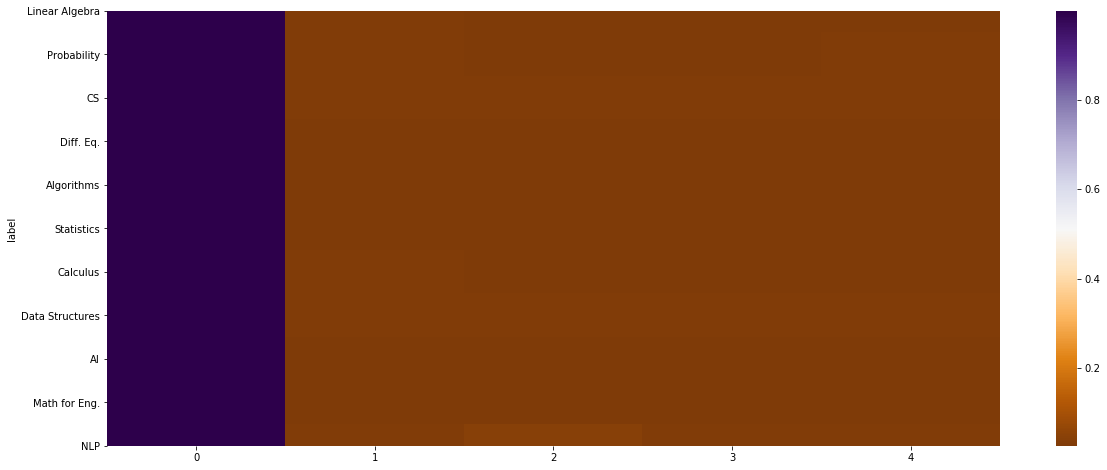

In [113]:
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(topic_mean_by_subject_freq, vmin=vmin, vmax=vmax, 
                              cmap='PuOr', xticklabels=True, yticklabels=True)
plt.show()

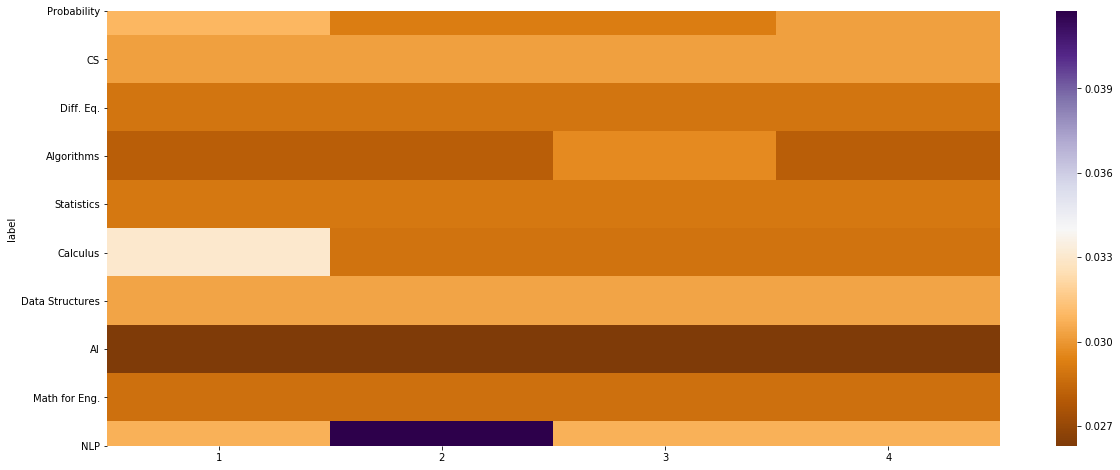

In [114]:
vmax_1 = pd.DataFrame(topic_mean_by_subject_freq.iloc[1:,1:]).max().max()
vmin_1 = pd.DataFrame(topic_mean_by_subject_freq.iloc[1:,1:]).min().min()
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(topic_mean_by_subject_freq.iloc[1:,1:], vmin=vmin_1, vmax=vmax_1, 
                              cmap='PuOr', xticklabels=True, yticklabels=True)
plt.show()

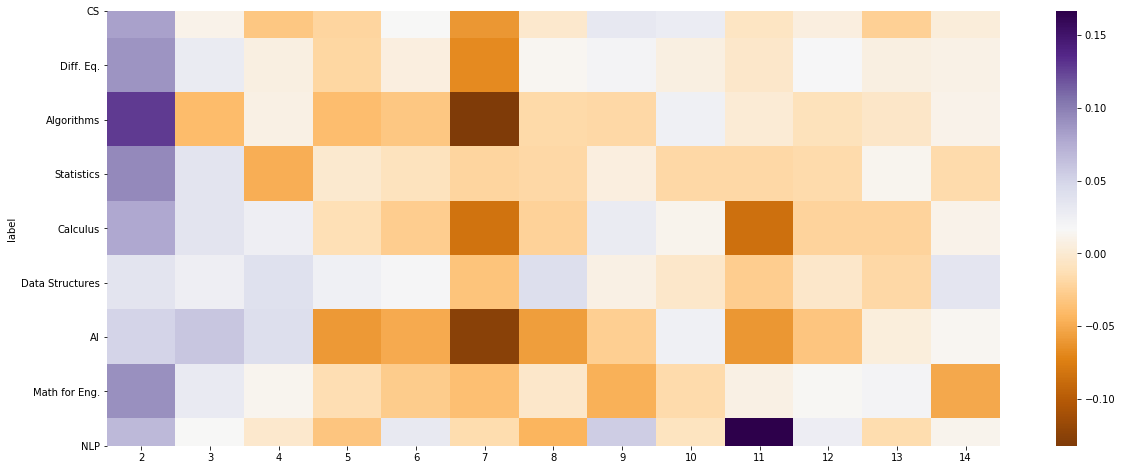

In [20]:
vmax_2 = pd.DataFrame(topic_mean_by_subject_freq.iloc[2:,2:]).max().max()
vmin_2 = pd.DataFrame(topic_mean_by_subject_freq.iloc[2:,2:]).min().min()
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(topic_mean_by_subject_freq.iloc[2:,2:], vmin=vmin_2, vmax=vmax_2, 
                              cmap='PuOr', xticklabels=True, yticklabels=True)
plt.show()

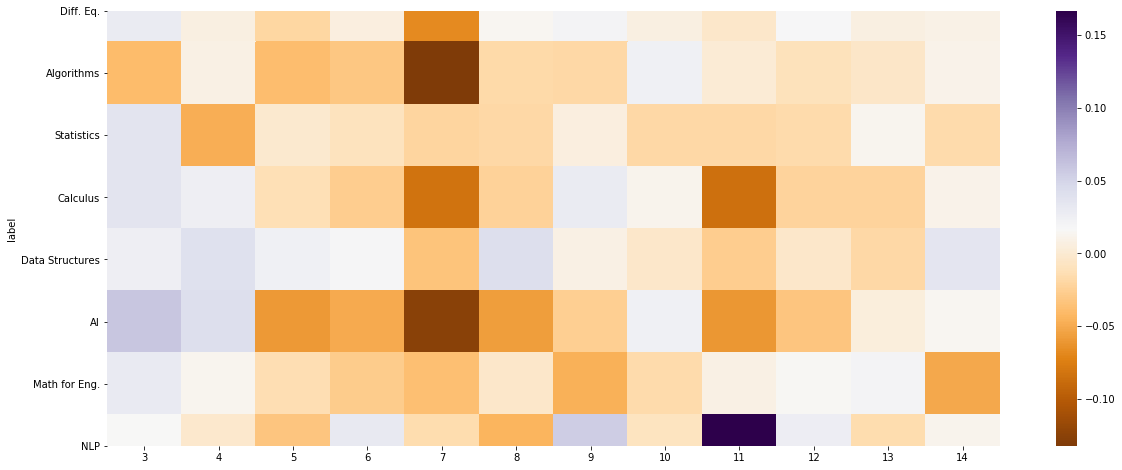

In [21]:
vmax_3 = pd.DataFrame(topic_mean_by_subject_freq.iloc[3:,3:]).max().max()
vmin_3 = pd.DataFrame(topic_mean_by_subject_freq.iloc[3:,3:]).min().min()
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(topic_mean_by_subject_freq.iloc[3:,3:], vmin=vmin_3, vmax=vmax_3, 
                              cmap='PuOr', xticklabels=True, yticklabels=True)
plt.show()

In [115]:
display_topics(model_components, feature_names, 10)


Topic  0
vector, probability, matrix, equation, row, node, column, solution, integral, derivative

Topic  1
operand, postfix, infix, precedence, expi, reduced, associativity, abcd, programmatically, prefix

Topic  2
sq, php, yay, html, currently, scope, browser, javascript, css, map

Topic  3
mult, console, plicitly, ed, return, tricky, php, ana, bell, nf

Topic  4
knot, reciprocal, inspire, satisfying, paste, logistic, business, logarithm, voice, white


In [ ]:
list(subjects.index)

In [ ]:
df[df['label']=='Linear Algebra']

In [ ]:
print(list(subjects.index))

In [ ]:
linalg_rd = pd.DataFrame(rd_v).iloc[df_linalg.index]
prob_rd = pd.DataFrame(rd_v).iloc[df_prob.index]
cs_rd = pd.DataFrame(rd_v).iloc[df_cs.index]
diffeq_rd = pd.DataFrame(rd_v).iloc[df_diffeq.index]
algo_rd = pd.DataFrame(rd_v).iloc[df_algo.index]
stats_rd = pd.DataFrame(rd_v).iloc[df_stats.index]
calc_rd = pd.DataFrame(rd_v).iloc[df_calc.index]
datastruc_rd = pd.DataFrame(rd_v).iloc[df_datastruc.index]
ai_rd = pd.DataFrame(rd_v).iloc[df_ai.index]
engmath_rd = pd.DataFrame(rd_v).iloc[df_engmath.index]
nlp_rd = pd.DataFrame(rd_v).iloc[df_nlp.index]


In [ ]:
rd_list = [linalg_rd, prob_rd, cs_rd, diffeq_rd, algo_rd, stats_rd, calc_rd, datastruc_rd, ai_rd, engmath_rd, nlp_rd]
rd_names = ["linalg_rd", "prob_rd", "cs_rd", "diffeq_rd", "algo_rd", "stats_rd", "calc_rd", "datastruc_rd", "ai_rd", "engmath_rd", "nlp_rd"]
rd_dict = {key:val for (key, val) in zip(rd_names, rd_list)}

I have created slices of the original dataframe based on their subject labels.  
Now I need to get their indices, and create a heatmap from each list of indices.

# Heat maps for each subject

In [ ]:
plt.figure(figsize=[20,3])
heat_map_linalg = sns.heatmap(linalg_rd.sample(19), vmin=-0.4, vmax=0.4, 
                              cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show();

In [ ]:
plt.figure(figsize=[20,3])
heat_map_nlp = sns.heatmap(nlp_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_prob = sns.heatmap(prob_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_cs = sns.heatmap(cs_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_diffeq = sns.heatmap(diffeq_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_algo = sns.heatmap(algo_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_stats = sns.heatmap(stats_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_calc = sns.heatmap(calc_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_datastruc = sns.heatmap(datastruc_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_ai = sns.heatmap(ai_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_engmath = sns.heatmap(engmath_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
plt.figure(figsize=[20,3])
heat_map_nlp = sns.heatmap(nlp_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
nlp_rd.shape

# Entropy

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
# If qk is not None, then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=0).
from scipy.stats import entropy
entropy(linalg_rd)

In [ ]:
entropy(prob_rd)[0]

In [ ]:
entropy_list = [entropy(x)[0].round(2) for x in rd_list]
# entropy_dict = {key:val for (key, val) in zip(rd_names, entropy(rd_list)[0])}
entropy_list

In [ ]:
for subj, ent in zip(list(subjects.index), entropy_list):
    print(f"Kullback-Leibler divergence of {subj}:", ent)

Divergence range for 60 topics: 2.89-4.93  
Divergence range for 50 topics: 2.91-4.93  
Divergence range for 40 topics: 2.91-4.94  
Divergence range for 30 topics: 2.91-4.95  
Divergence range for 20 topics: 2.91-4.96  
Divergence range for 10 topics: 2.90-4.96  
Divergence range for 5 topics: 2.90-4.98